In [1]:
%%time
import malaya

CPU times: user 12.6 s, sys: 1.5 s, total: 14.1 s
Wall time: 17.9 s


In [2]:
string = 'Benda yg SALAH ni, jgn lah didebatkan. Yg SALAH xkan jadi betul. Ingat tu. Mcm mana kesat sekalipun org sampaikan mesej, dan memang benda tu salah, diam je. Xyah nk tunjuk kau open sangat nk tegur cara org lain berdakwah. '
another_string = 'bodoh, dah la gay, sokong lgbt lagi, memang tak guna'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return classes more than 0.5 probability. **Default is False.**

## Load multinomial model

In [3]:
model = malaya.toxic.multinomial()

In [4]:
model.predict(string)

[]

In [5]:
model.predict(string,get_proba=True)

{'toxic': 0.14165235977019472,
 'severe_toxic': 1.9272487152616215e-06,
 'obscene': 0.011323038998473341,
 'threat': 8.249039905334012e-08,
 'insult': 0.008620760536227347,
 'identity_hate': 4.703244329372946e-06}

In [6]:
model.predict(another_string)

['toxic', 'insult']

In [7]:
model.predict(another_string,get_proba=True)

{'toxic': 0.97624511869432,
 'severe_toxic': 0.0004143925305717536,
 'obscene': 0.48936571876841484,
 'threat': 5.809081616106756e-06,
 'insult': 0.7853970362543069,
 'identity_hate': 0.002109806847753244}

In [8]:
model.predict_batch([string,another_string])

[[], ['toxic', 'insult']]

In [9]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.14165235977019472,
  'severe_toxic': 1.9272487152616215e-06,
  'obscene': 0.011323038998473341,
  'threat': 8.249039905334012e-08,
  'insult': 0.008620760536227347,
  'identity_hate': 4.703244329372946e-06},
 {'toxic': 0.97624511869432,
  'severe_toxic': 0.0004143925305717536,
  'obscene': 0.48936571876841484,
  'threat': 5.809081616106756e-06,
  'insult': 0.7853970362543069,
  'identity_hate': 0.002109806847753244}]

## Load logistics model

In [10]:
model = malaya.toxic.logistic()

In [11]:
model.predict(string)

[]

In [12]:
model.predict_batch([string,another_string],get_proba=True)

[{'toxic': 0.10299208923447233,
  'severe_toxic': 0.010195223990855215,
  'obscene': 0.04834509566263489,
  'threat': 0.003488478318883341,
  'insult': 0.04528784776538583,
  'identity_hate': 0.011326619000125776},
 {'toxic': 0.6297643126911581,
  'severe_toxic': 0.019551370640497476,
  'obscene': 0.1995748012804703,
  'threat': 0.004014463652898358,
  'insult': 0.3354069432946268,
  'identity_hate': 0.052626041879065236}]

## List available deep learning models

In [13]:
malaya.toxic.available_deep_model()

['self-attention', 'bahdanau', 'luong']

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load bahdanau model

In [15]:
model = malaya.toxic.deep_model(model = 'bahdanau')

#### Predict single string

In [16]:
model.predict(string)

[]

In [17]:
result = model.predict(another_string, get_proba = True)
result

{'toxic': 0.75407517,
 'severe_toxic': 0.16274202,
 'obscene': 0.5291958,
 'threat': 0.10058941,
 'insult': 0.75971705,
 'identity_hate': 0.8826025,
 'attention': {'bodoh': 0.10320988,
  ',': 0.0,
  'dah': 0.027506806,
  'la': 0.021144494,
  'gay': 0.4988079,
  'sokong': 0.06969115,
  'lgbt': 0.20489135,
  'lagi': 0.018106166,
  'memang': 0.02190801,
  'tak': 0.017407918,
  'guna': 0.017326297}}

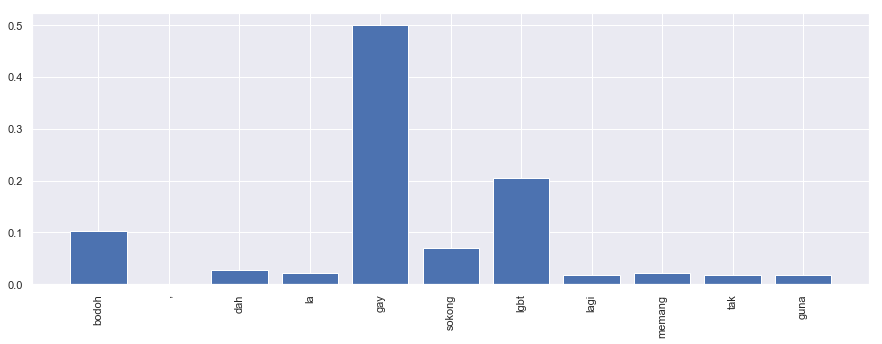

In [18]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open toxicity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [19]:
model.predict_words(another_string)

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [01/Jun/2019 12:12:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:12:10] "GET /static/admin-materialize.min.css HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:12:10] "GET /static/echarts.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2019 12:12:11] "GET /favicon.ico HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 61873)
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 361, in finish_request
    self.Re


stopping Server...


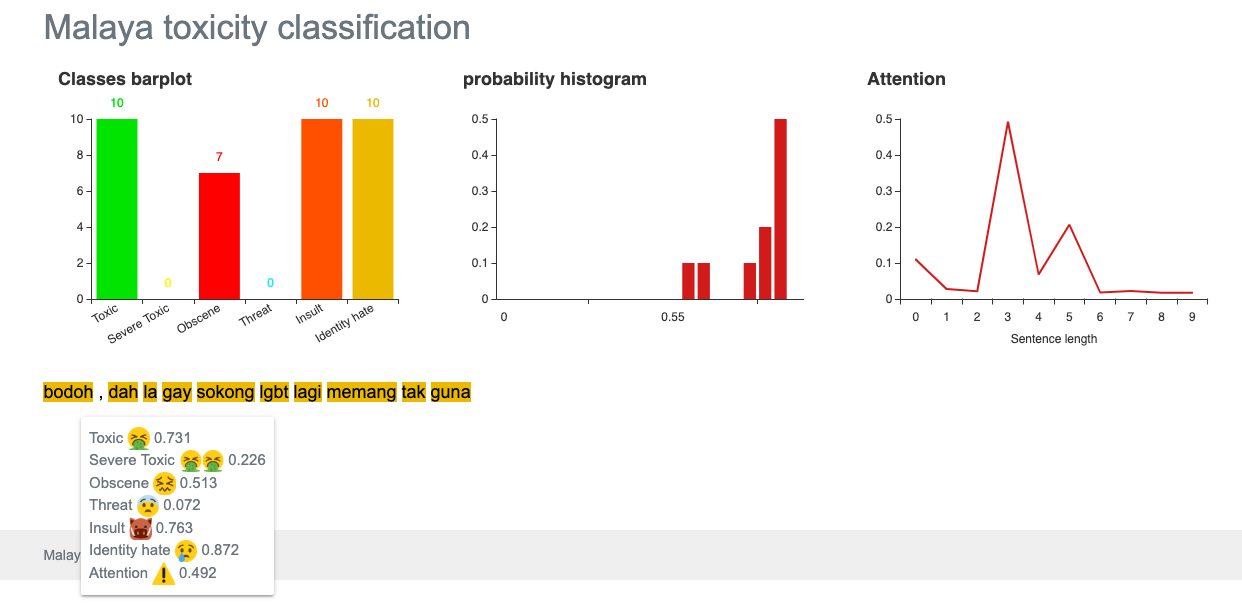

In [20]:
from IPython.core.display import Image, display

display(Image('toxicity.png', width=800))

#### Predict batch of strings

In [21]:
model.predict_batch([string, another_string],get_proba=True)

[{'toxic': 0.21699297,
  'severe_toxic': 0.021610105,
  'obscene': 0.110013016,
  'threat': 0.010765828,
  'insult': 0.10372056,
  'identity_hate': 0.03946534},
 {'toxic': 0.93524134,
  'severe_toxic': 0.33446547,
  'obscene': 0.7178085,
  'threat': 0.56429744,
  'insult': 0.8922918,
  'identity_hate': 0.9618688}]

**You might want to try `luong` and `self-attention` by yourself.**

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [ ]:
multinomial = malaya.toxic.multinomial()
logistics = malaya.toxic.logistic()
bahdanau = malaya.toxic.deep_model('bahdanau')

In [ ]:
malaya.stack.predict_stack([multinomial, logistics, bahdanau], another_string)